In [1]:
import os
import pandas as pd

In [2]:
data_path = "E:/_TUGAS/_ITBOneDrive/OneDrive - Institut Teknologi Bandung/_Kuliah/_sem7/7_kerja praktek/data/repetisi RC"
folder_path = ["465ohm variasi C/", "1003ohm variasi C/", "1468ohm variasi C/"]

i = 0
for f in folder_path:
    folder_path[i] = os.path.join(data_path, f)
    print(folder_path[i])
    i += 1

E:/_TUGAS/_ITBOneDrive/OneDrive - Institut Teknologi Bandung/_Kuliah/_sem7/7_kerja praktek/data/repetisi RC\465ohm variasi C/
E:/_TUGAS/_ITBOneDrive/OneDrive - Institut Teknologi Bandung/_Kuliah/_sem7/7_kerja praktek/data/repetisi RC\1003ohm variasi C/
E:/_TUGAS/_ITBOneDrive/OneDrive - Institut Teknologi Bandung/_Kuliah/_sem7/7_kerja praktek/data/repetisi RC\1468ohm variasi C/


In [3]:
# scan all files
path, dirs, files = next(os.walk(folder_path[1]))
file_count = len(files)
# create empty list
df_list = []

for file in files:
    print(file)

1003ohm (1).csv
1003ohm (2).csv
1003ohm (3).csv
1003ohm (4).csv
1003ohm (5).csv
1003ohm 10.57nF (1).csv
1003ohm 10.57nF (2).csv
1003ohm 10.57nF (3).csv
1003ohm 10.57nF (4).csv
1003ohm 10.57nF (5).csv
1003ohm 150pF (1).csv
1003ohm 150pF (2).csv
1003ohm 150pF (3).csv
1003ohm 150pF (4).csv
1003ohm 150pF (5).csv
1003ohm 180pF (1).csv
1003ohm 180pF (2).csv
1003ohm 180pF (3).csv
1003ohm 180pF (4).csv
1003ohm 180pF (5).csv
1003ohm 3.83nF (1).csv
1003ohm 3.83nF (2).csv
1003ohm 3.83nF (3).csv
1003ohm 3.83nF (4).csv
1003ohm 3.83nF (5).csv
1003ohm 5.53nF (1).csv
1003ohm 5.53nF (2).csv
1003ohm 5.53nF (3).csv
1003ohm 5.53nF (4).csv
1003ohm 5.53nF (5).csv
1003ohm 90pF (1).csv
1003ohm 90pF (2).csv
1003ohm 90pF (3).csv
1003ohm 90pF (4).csv
1003ohm 90pF (5).csv


In [4]:
# append datasets to the list
for i in range(len(files)):
    temp_df = pd.read_csv(folder_path[1]+files[i])
    df_list.append(temp_df)

    print(df_list[i].head())

   Frequency    Impedance     Phase  Real  Imaginary   Magnitude  Unnamed: 6
0      20000  1001.987975 -0.014035   227       -936  963.132909         NaN
1      21000   999.212650  0.128615   240       -936  966.279463         NaN
2      22000  1004.272040 -0.041891   250       -933  965.913557         NaN
3      23000  1001.718865  0.040882   264       -930  966.745054         NaN
4      24000  1001.706296  0.040061   275       -924  964.054459         NaN
   Frequency    Impedance     Phase  Real  Imaginary   Magnitude  Unnamed: 6
0      20000  1005.276998 -0.029837   226       -933  959.981771         NaN
1      21000  1005.779165  0.101931   238       -930  959.970833         NaN
2      22000  1002.730421  0.057197   252       -934  967.398573         NaN
3      23000  1002.283119 -0.073211   262       -930  966.200807         NaN
4      24000  1002.002283 -0.016918   274       -924  963.769682         NaN
   Frequency    Impedance     Phase  Real  Imaginary   Magnitude  Unnamed: 6

In [5]:
# delete column contains NaN
for df in df_list:
    # get column name
    column_list = []
    for col in df.columns:
        column_list.append(col)
    
    # delete column after "Magnitude"
    # "Magnitude" in index 5
    for i in range(len(column_list)):
        if i > 5: del df[column_list[i]]
    
    print(df.head())

   Frequency    Impedance     Phase  Real  Imaginary   Magnitude
0      20000  1001.987975 -0.014035   227       -936  963.132909
1      21000   999.212650  0.128615   240       -936  966.279463
2      22000  1004.272040 -0.041891   250       -933  965.913557
3      23000  1001.718865  0.040882   264       -930  966.745054
4      24000  1001.706296  0.040061   275       -924  964.054459
   Frequency    Impedance     Phase  Real  Imaginary   Magnitude
0      20000  1005.276998 -0.029837   226       -933  959.981771
1      21000  1005.779165  0.101931   238       -930  959.970833
2      22000  1002.730421  0.057197   252       -934  967.398573
3      23000  1002.283119 -0.073211   262       -930  966.200807
4      24000  1002.002283 -0.016918   274       -924  963.769682
   Frequency    Impedance     Phase  Real  Imaginary   Magnitude
0      20000  1004.260246 -0.043874   226       -934  960.953693
1      21000  1001.991119 -0.014639   237       -934  963.600021
2      22000  1004.272040

In [6]:
# info of sample dataframe
df_list[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Frequency  31 non-null     int64  
 1   Impedance  31 non-null     float64
 2   Phase      31 non-null     float64
 3   Real       31 non-null     int64  
 4   Imaginary  31 non-null     int64  
 5   Magnitude  31 non-null     float64
dtypes: float64(3), int64(3)
memory usage: 1.6 KB


In [7]:
# extract the RC value
arr_filename = []
for f in files:
    arr_filename.append( [f[:-8]] )

print(arr_filename)

# detect R and C in array
variation_data = arr_filename.copy()
i = 0
for var in variation_data:  # var is list that contain 1 element (string)
    for name in var:        # access the string only
        # remove units
        want_to_replaced = ["ohm", "F"]
        for str in want_to_replaced:
            if str in name:
                name = name.replace(str, "")
        
        variation_data[i] = name
        i += 1

print(variation_data)

[['1003ohm'], ['1003ohm'], ['1003ohm'], ['1003ohm'], ['1003ohm'], ['1003ohm 10.57nF'], ['1003ohm 10.57nF'], ['1003ohm 10.57nF'], ['1003ohm 10.57nF'], ['1003ohm 10.57nF'], ['1003ohm 150pF'], ['1003ohm 150pF'], ['1003ohm 150pF'], ['1003ohm 150pF'], ['1003ohm 150pF'], ['1003ohm 180pF'], ['1003ohm 180pF'], ['1003ohm 180pF'], ['1003ohm 180pF'], ['1003ohm 180pF'], ['1003ohm 3.83nF'], ['1003ohm 3.83nF'], ['1003ohm 3.83nF'], ['1003ohm 3.83nF'], ['1003ohm 3.83nF'], ['1003ohm 5.53nF'], ['1003ohm 5.53nF'], ['1003ohm 5.53nF'], ['1003ohm 5.53nF'], ['1003ohm 5.53nF'], ['1003ohm 90pF'], ['1003ohm 90pF'], ['1003ohm 90pF'], ['1003ohm 90pF'], ['1003ohm 90pF']]
['1003', '1003', '1003', '1003', '1003', '1003 10.57n', '1003 10.57n', '1003 10.57n', '1003 10.57n', '1003 10.57n', '1003 150p', '1003 150p', '1003 150p', '1003 150p', '1003 150p', '1003 180p', '1003 180p', '1003 180p', '1003 180p', '1003 180p', '1003 3.83n', '1003 3.83n', '1003 3.83n', '1003 3.83n', '1003 3.83n', '1003 5.53n', '1003 5.53n', '1003

In [8]:
# drop duplicate value
temp_arr = []
for i in range(len(variation_data)):
    if variation_data[i] not in temp_arr:
        temp_arr.append(variation_data[i])

variation_data = temp_arr.copy()
print(variation_data)

['1003', '1003 10.57n', '1003 150p', '1003 180p', '1003 3.83n', '1003 5.53n', '1003 90p']


In [9]:
# convert "p" and "n" into 1e(-N)
convert_unit = [["k", "e3"], ["u", "e-6"], ["n", "e-9"], ["p", "e-12"]]
for i in range(len(variation_data)):
    for unit_str, unit_val in convert_unit:
        if unit_str in variation_data[i]:
            mystr = variation_data[i]
            variation_data[i] = mystr.replace(unit_str, unit_val)

print(variation_data)

['1003', '1003 10.57e-9', '1003 150e-12', '1003 180e-12', '1003 3.83e-9', '1003 5.53e-9', '1003 90e-12']


In [10]:
# split as [[R1, C1], [R2, C2], ...]
for i in range(len(variation_data)):
    mystr = variation_data[i]
    arr_split = mystr.split(" ")
    variation_data[i] = arr_split

print(variation_data)

[['1003'], ['1003', '10.57e-9'], ['1003', '150e-12'], ['1003', '180e-12'], ['1003', '3.83e-9'], ['1003', '5.53e-9'], ['1003', '90e-12']]


In [11]:
# convert as float
for i in range(len(variation_data)):
    if len(variation_data[i]) != 2:     # only R
        variation_data[i].append(0)     # add value of C = 0
    for j in range(len(variation_data[i])):
        variation_data[i][j] = float(variation_data[i][j])

print(variation_data)

[[1003.0, 0.0], [1003.0, 1.057e-08], [1003.0, 1.5e-10], [1003.0, 1.8e-10], [1003.0, 3.83e-09], [1003.0, 5.53e-09], [1003.0, 9e-11]]


In [12]:
from formula import *

fstart = 20e3
fend = 50e3

fmid = calculate_fmid(fstart, fend)
print("fmid =", fmid)

# list xc
arr_xc = []
arr_z = []


for i in range(len(variation_data)):
    r = variation_data[i][0]
    c = variation_data[i][1]
    xc = calculate_xc(fmid, c)
    z = calculate_z(r, xc)

    arr_xc.append(xc)
    arr_z.append(z)
    
print("arr_z =", arr_z)

fmid = 35000.0
arr_z = [1003.0000000000001, 395.3723892273706, 1002.451477090049, 1002.2104119420248, 766.1923200527444, 635.9049193667619, 1002.8024280386211]


In [13]:
# calculate error Z
iteration = len(df_list) // len(variation_data)

i = 0
for df in df_list:
    df["%Z"] = calculate_error(arr_z[i//iteration], df["Impedance"])
    i += 1
    
    print(df.head())

   Frequency    Impedance     Phase  Real  Imaginary   Magnitude        %Z
0      20000  1001.987975 -0.014035   227       -936  963.132909  0.100900
1      21000   999.212650  0.128615   240       -936  966.279463  0.377602
2      22000  1004.272040 -0.041891   250       -933  965.913557  0.126824
3      23000  1001.718865  0.040882   264       -930  966.745054  0.127730
4      24000  1001.706296  0.040061   275       -924  964.054459  0.128983
   Frequency    Impedance     Phase  Real  Imaginary   Magnitude        %Z
0      20000  1005.276998 -0.029837   226       -933  959.981771  0.227019
1      21000  1005.779165  0.101931   238       -930  959.970833  0.277085
2      22000  1002.730421  0.057197   252       -934  967.398573  0.026877
3      23000  1002.283119 -0.073211   262       -930  966.200807  0.071474
4      24000  1002.002283 -0.016918   274       -924  963.769682  0.099473
   Frequency    Impedance     Phase  Real  Imaginary   Magnitude            %Z
0      20000  1004.26

In [14]:
# create arr of title. For grapfh's title
# manipulate arr_filename
for i in range(len(arr_filename)):
    arr_filename[i] = arr_filename[i][0]

arr_title = []
for i in range(len(arr_filename)-1):
    if arr_filename[i] not in arr_title:
        arr_title.append(arr_filename[i])

print(arr_title)

['1003ohm', '1003ohm 10.57nF', '1003ohm 150pF', '1003ohm 180pF', '1003ohm 3.83nF', '1003ohm 5.53nF', '1003ohm 90pF']


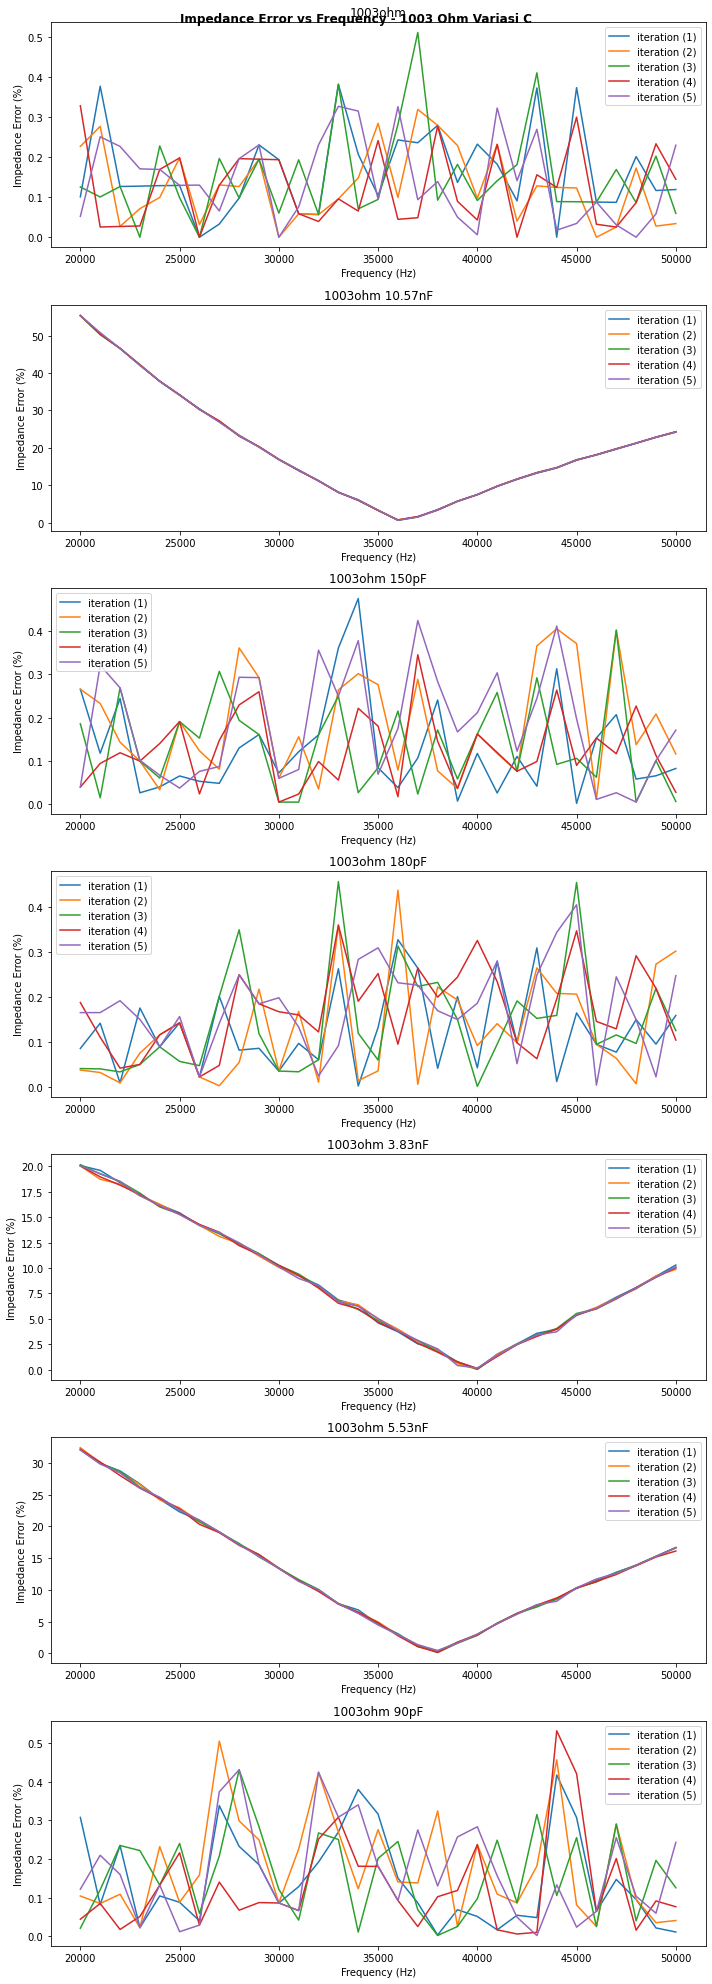

In [79]:
import matplotlib.pyplot as plt

# compare data for each itearation
fig, axs = plt.subplots(nrows=len(arr_title), figsize=(10,4*len(arr_title)))

count = 1   # to multiply the second loop (iteration)
for ax in axs:
    for i in range(iteration*(count-1), iteration*count):
        # print(i//iteration, arr_title[i//iteration])
        label_idx = (i+1) - iteration*(count-1)
        df_list[i].plot(x="Frequency", y="%Z", label="iteration (%s)" %label_idx, ax=ax)

        if i == iteration*count - 1:
            ax.set_title(arr_title[i//iteration])
    # print()
    count += 1

    ax.set_xlabel("Frequency (Hz)")
    ax.set_ylabel("Impedance Error (%)")

plt.suptitle("Impedance Error vs Frequency - 1003 Ohm Variasi C", fontsize = "xx-large", weight = "bold")
plt.tight_layout()

plt.show()